In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier

# Load the dataset
df = pd.read_csv(r"C:\Users\saira\OneDrive\Desktop\DePaul\DSC 478\Project\Churn_Modelling.csv") 

print(df.head())
print(df.info())
print(df.describe())


   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

#### Creating Dummy variables, Splitting features and target data

In [4]:
# Drop unnecessary columns, if any
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

# Encode categorical variables with pd.get_dummies()
df = pd.get_dummies(df)

# Split data into features and target
X = df.drop('Exited', axis=1)
y = df['Exited']


#### Train and Test Set Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

#### Feature Scaling

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

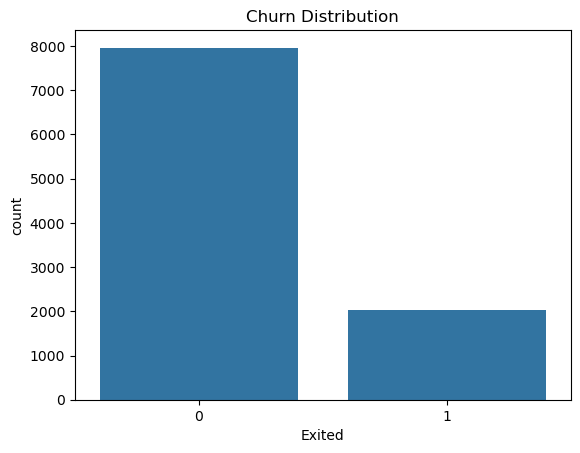

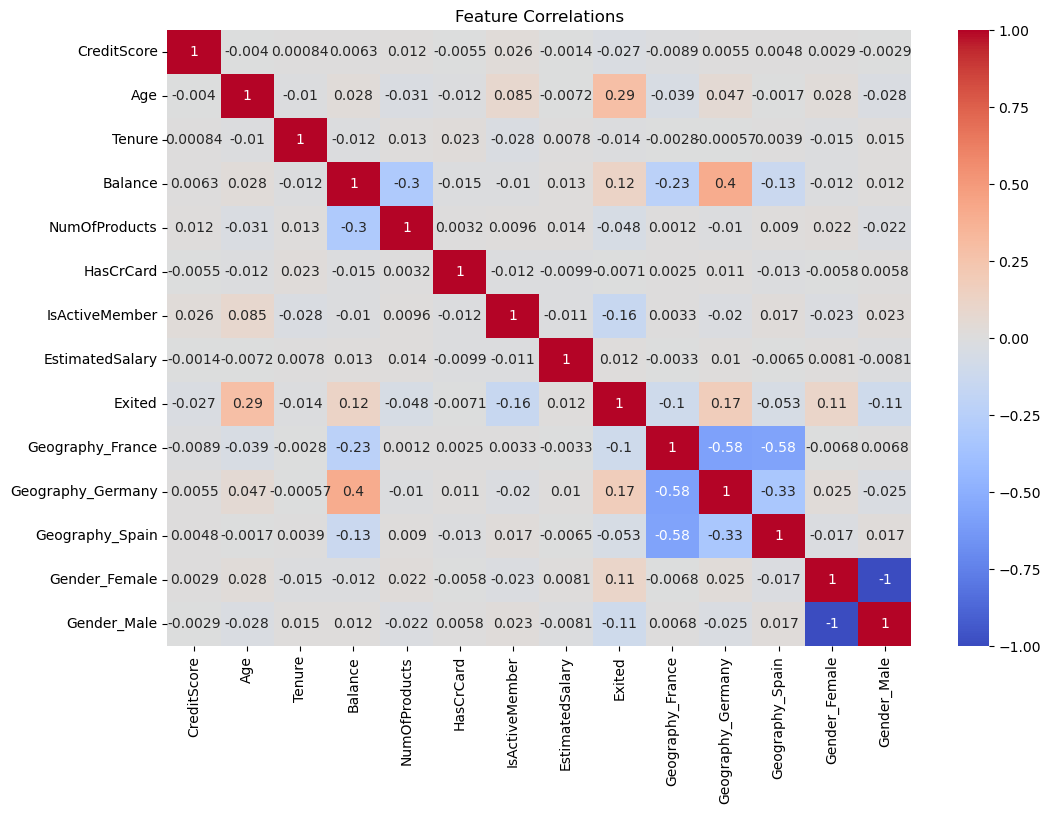

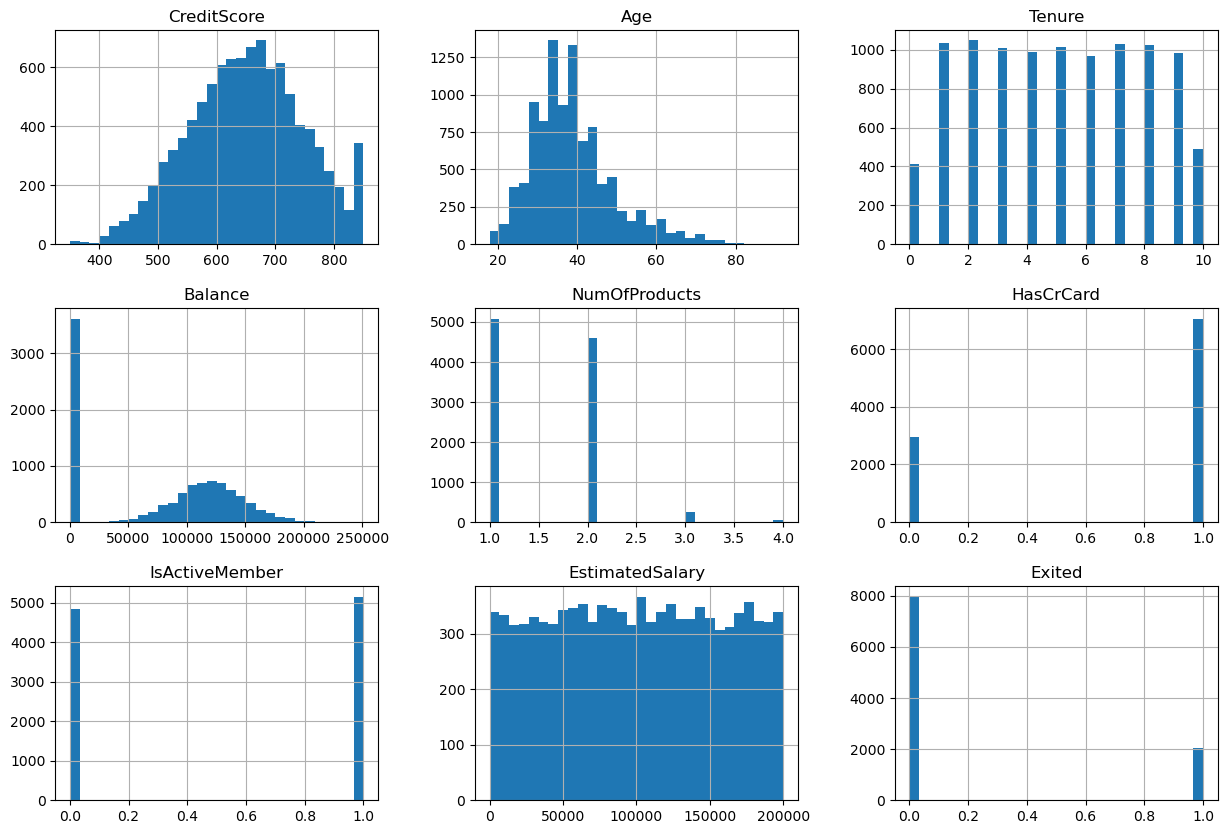

In [5]:
# Visualize Churn Distribution
sns.countplot(x='Exited', data=df)
plt.title("Churn Distribution")
plt.show()

# Plot correlations
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlations")
plt.show()

# Histograms for numeric features
df.hist(bins=30, figsize=(15, 10))
plt.show()


#### Model Building and Evaluation

In [8]:
from sklearn import metrics

def measure_performance(X, y, clf, show_accuracy=True, show_classification_report=True, show_confusion_matrix=True):
    y_pred = clf.predict(X)   
    if show_accuracy:
         print("Accuracy:{0:.3f}".format(metrics.accuracy_score(y, y_pred)),"\n")
    if show_classification_report:
        print("Classification report")
        print(metrics.classification_report(y, y_pred),"\n")
      
    if show_confusion_matrix:
        print("Confusion matrix")
        print(metrics.confusion_matrix(y, y_pred),"\n")

In [9]:
# Undersampling

from imblearn.under_sampling import RandomUnderSampler

# Initialize RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Resample the training dataset
X_train_res, y_train_res = rus.fit_resample(X_train, y_train)

# Check the new class distribution
print("Class distribution after undersampling:")
print(pd.Series(y_train_res).value_counts())


Class distribution after undersampling:
Exited
0    1426
1    1426
Name: count, dtype: int64


#### 1. Logistic Regression

In [152]:
log_reg = LogisticRegression(max_iter=200, random_state=42)
log_reg.fit(X_train, y_train)
#y_pred_lr = log_reg.predict(X_test)

#evaluate_model(log_reg, X_train, y_train)

#print("Logistic Regression Model Performance:")
print("Logistic Regression Model Performance(Test Set):")
measure_performance(X_test, y_test, log_reg, show_confusion_matrix=False)
print("Logistic Regression Model Performance(Train Set):")
measure_performance(X_train, y_train, log_reg, show_confusion_matrix=False)

Logistic Regression Model Performance(Test Set):
Accuracy:0.814 

Classification report
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      2389
           1       0.65      0.19      0.29       611

    accuracy                           0.81      3000
   macro avg       0.74      0.58      0.59      3000
weighted avg       0.79      0.81      0.77      3000
 

Logistic Regression Model Performance(Train Set):
Accuracy:0.811 

Classification report
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      5574
           1       0.62      0.19      0.29      1426

    accuracy                           0.81      7000
   macro avg       0.72      0.58      0.59      7000
weighted avg       0.78      0.81      0.77      7000
 



In [127]:
# Sampled Logistic Regression

log_reg_resampled = log_reg.fit(X_train_res, y_train_res)
print("Logistic Regression Model Performance(Test Set) after resampling:")
measure_performance(X_test, y_test, log_reg_resampled, show_confusion_matrix=False)


Logistic Regression Model Performance(Test Set) after resampling:
Accuracy:0.717 

Classification report
              precision    recall  f1-score   support

           0       0.91      0.71      0.80      2389
           1       0.39      0.73      0.51       611

    accuracy                           0.72      3000
   macro avg       0.65      0.72      0.66      3000
weighted avg       0.81      0.72      0.74      3000
 



#### 2. DecisionTree Classifier

In [106]:
# Criterion Parameter
dt = DecisionTreeClassifier(criterion='entropy')
scores = cross_val_score(dt, X_train, y_train, cv=5)
print("Entropy criterion accuracy on cv: {0:.3f}".format(scores.mean()))

dt = DecisionTreeClassifier(criterion='gini')
scores = cross_val_score(dt, X_train, y_train, cv=5)
print("Gini criterion accuracy on cv: {0:.3f}".format(scores.mean()))

Entropy criterion accuracy on cv: 0.796
Gini criterion accuracy on cv: 0.781


In [154]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
dt.fit(X_train, y_train)
print("Decision Tree Model Performance(Test Set):")
measure_performance(X_test, y_test, dt, show_confusion_matrix=False)
print("Decision Tree Model Performance(Train Set):")
measure_performance(X_train, y_train, dt, show_confusion_matrix=False)

Decision Tree Model Performance(Test Set):
Accuracy:0.861 

Classification report
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      2389
           1       0.72      0.52      0.60       611

    accuracy                           0.86      3000
   macro avg       0.80      0.73      0.76      3000
weighted avg       0.85      0.86      0.85      3000
 

Decision Tree Model Performance(Train Set):
Accuracy:0.856 

Classification report
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      5574
           1       0.72      0.48      0.58      1426

    accuracy                           0.86      7000
   macro avg       0.80      0.72      0.75      7000
weighted avg       0.85      0.86      0.85      7000
 



In [110]:
# Resampling
dt_resampled = dt.fit(X_train_res, y_train_res)
print("Decision Tree Model Performance(Test Set) after resampling:")
measure_performance(X_test, y_test, dt_resampled, show_confusion_matrix=False)


Decision Tree Model Performance(Test Set) after resampling:
Accuracy:0.770 

Classification report
              precision    recall  f1-score   support

           0       0.91      0.78      0.84      2389
           1       0.46      0.72      0.56       611

    accuracy                           0.77      3000
   macro avg       0.69      0.75      0.70      3000
weighted avg       0.82      0.77      0.79      3000
 



In [150]:
# --- Hyperparameter Tuning for Decision Tree using Grid Search---
dt_param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, None],
    'min_samples_split': [2, 5, 7, 9, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}
dt_model = DecisionTreeClassifier(random_state=42)
dt_grid_search = GridSearchCV(estimator=dt_model, param_grid=dt_param_grid, cv=5, scoring='accuracy')
dt_grid_search.fit(X_train, y_train)
dt_best_model = dt_grid_search.best_estimator_

dt_best_pred = dt_best_model.predict(X_test)
print("Decision Tree - Best Parameters:", dt_grid_search.best_params_)
print("Decision Tree - Classification Report:\n", classification_report(y_test, dt_best_pred))
print("Decision Tree - Accuracy:", accuracy_score(y_test, dt_best_pred))

Decision Tree - Best Parameters: {'max_depth': 6, 'min_samples_leaf': 5, 'min_samples_split': 2}
Decision Tree - Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      2389
           1       0.77      0.46      0.58       611

    accuracy                           0.86      3000
   macro avg       0.82      0.71      0.75      3000
weighted avg       0.85      0.86      0.85      3000

Decision Tree - Accuracy: 0.862


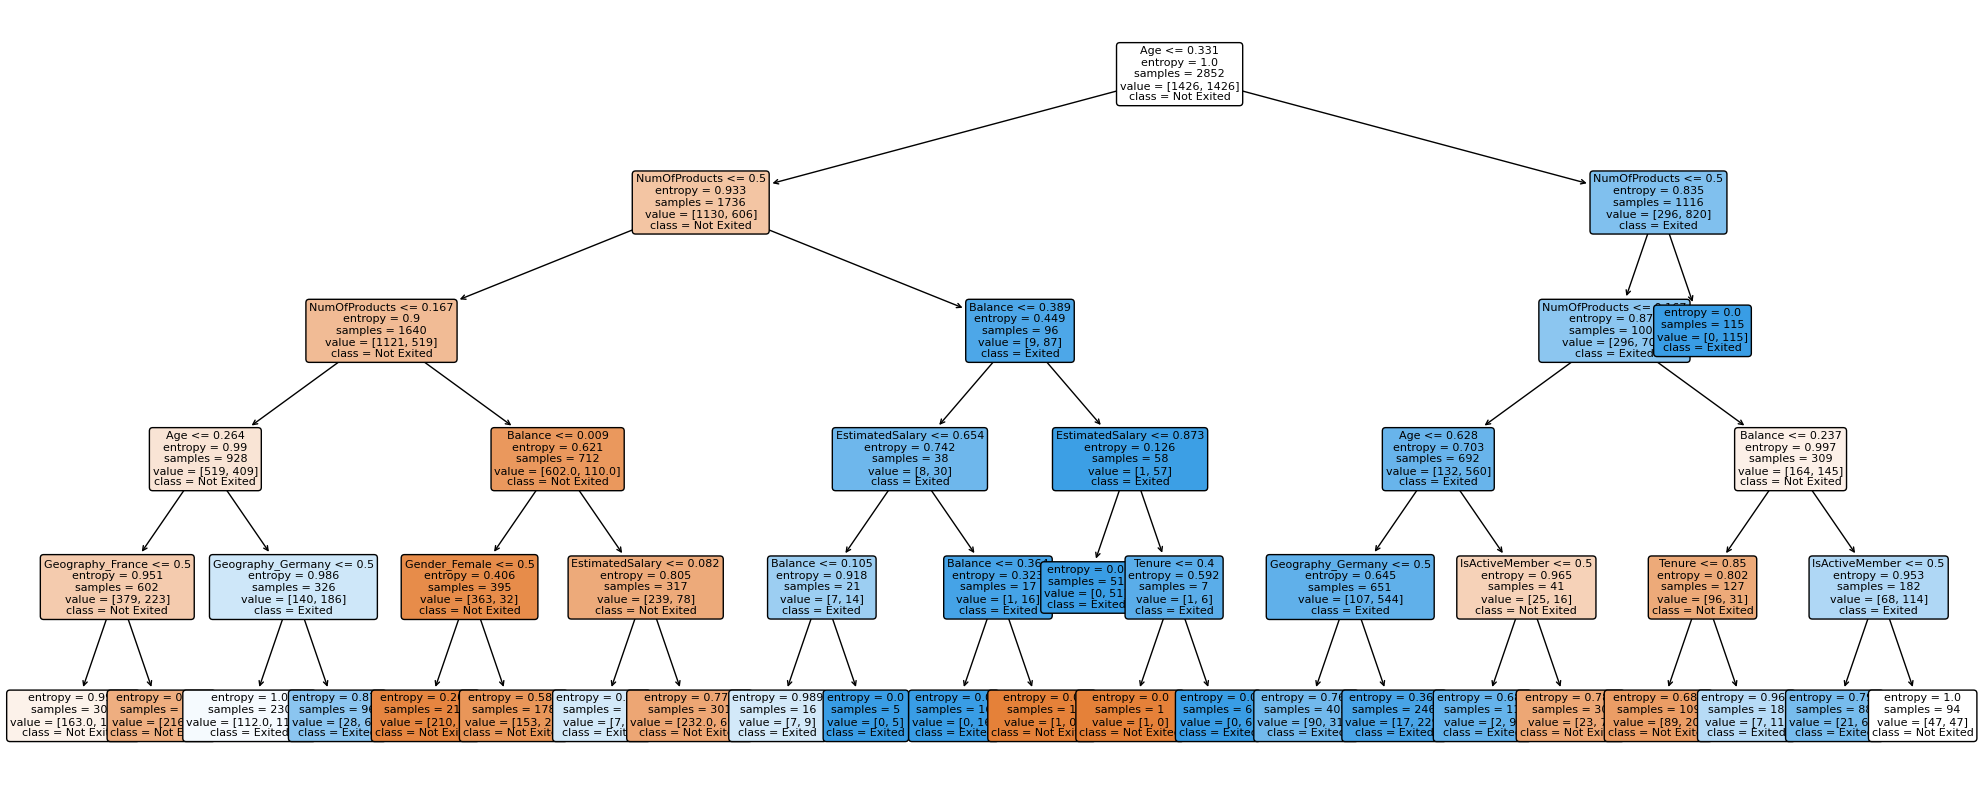

In [113]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 10))  
plot_tree(dt, 
          feature_names=X.columns, 
          class_names=['Not Exited', 'Exited'], 
          fontsize=8,
          filled=True, 
          rounded=True)
plt.show()


#### 3. RandomForest Classifier

In [156]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
#evaluate_model(rf, X_train, y_train)
rf.fit(X_train, y_train)
print("Random Forest Model Performance(Test Set):")
measure_performance(X_test, y_test, rf, show_confusion_matrix=False)
print("Random Forest Model Performance(Train Set):")
measure_performance(X_train, y_train, rf, show_confusion_matrix=False)

Random Forest Model Performance(Test Set):
Accuracy:0.863 

Classification report
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2389
           1       0.78      0.46      0.58       611

    accuracy                           0.86      3000
   macro avg       0.83      0.71      0.75      3000
weighted avg       0.85      0.86      0.85      3000
 

Random Forest Model Performance(Train Set):
Accuracy:1.000 

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5574
           1       1.00      1.00      1.00      1426

    accuracy                           1.00      7000
   macro avg       1.00      1.00      1.00      7000
weighted avg       1.00      1.00      1.00      7000
 



In [ ]:
There seems to be overfitting since the training set results in 100% accuracy. 
Hence, hyperparameter tuning has to be done on the Random Forest model.

In [213]:

# Define the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [5, 10, 20, None],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required at each leaf node
    #'max_features': ['sqrt', 'log2', None],  # Number of features to consider for splitting a node
    #'bootstrap': [True, False]  # Whether to use bootstrap samples
}

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           scoring='accuracy', cv=5, verbose=2, n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_rf = grid_search.best_estimator_

# Print the best parameters and the corresponding best accuracy score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-validation Accuracy:", grid_search.best_score_)

# Evaluate the model with the best parameters on the test set
print("Random Forest Model Performance (Test Set):")
measure_performance(X_test, y_test, best_rf, show_confusion_matrix=False)

# Evaluate the model with the best parameters on the train set
print("Random Forest Model Performance (Train Set):")
measure_performance(X_train, y_train, best_rf, show_confusion_matrix=False)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best Cross-validation Accuracy: 0.859
Random Forest Model Performance (Test Set):
Accuracy:0.871 

Classification report
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2389
           1       0.82      0.47      0.60       611

    accuracy                           0.87      3000
   macro avg       0.85      0.72      0.76      3000
weighted avg       0.87      0.87      0.86      3000
 

Random Forest Model Performance (Train Set):
Accuracy:0.927 

Classification report
              precision    recall  f1-score   support

           0       0.92      0.99      0.96      5574
           1       0.96      0.67      0.79      1426

    accuracy                           0.93      7000
   macro avg       0.94      0.83      0.87      7000
weighted avg       0.93  

In [176]:
# Resampling
rf_resampled = best_rf.fit(X_train_res, y_train_res)
print("Random Forest Model Performance(Test Set) after resampling:")
measure_performance(X_test, y_test, rf_resampled, show_confusion_matrix=False)


Random Forest Model Performance(Test Set) after resampling:
Accuracy:0.794 

Classification report
              precision    recall  f1-score   support

           0       0.94      0.79      0.86      2389
           1       0.50      0.79      0.61       611

    accuracy                           0.79      3000
   macro avg       0.72      0.79      0.74      3000
weighted avg       0.85      0.79      0.81      3000
 



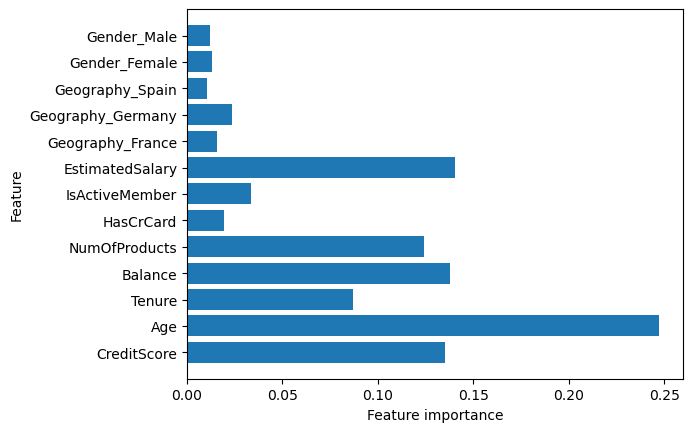

In [180]:
import pylab as plt
%matplotlib inline

def plot_feature_importances(model, n_features, feature_names):
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(rf, len(X.columns), X.columns)


#### 4. Gradient Boosting Classifier

In [182]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)
#y_pred_gb = gb.predict(X_test)
#print("Gradient Boosting Classifier:")
print("Gradient Boosting Classifier Model Performance(Test Set):")
measure_performance(X_test, y_test, gb, show_confusion_matrix=False)
print("Gradient Boosting Classifier Model Performance(Train Set):")
measure_performance(X_train, y_train, gb, show_confusion_matrix=False)



Gradient Boosting Classifier Model Performance(Test Set):
Accuracy:0.873 

Classification report
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2389
           1       0.80      0.50      0.61       611

    accuracy                           0.87      3000
   macro avg       0.84      0.73      0.77      3000
weighted avg       0.87      0.87      0.86      3000
 

Gradient Boosting Classifier Model Performance(Train Set):
Accuracy:0.872 

Classification report
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      5574
           1       0.82      0.48      0.61      1426

    accuracy                           0.87      7000
   macro avg       0.85      0.73      0.77      7000
weighted avg       0.87      0.87      0.86      7000
 



In [184]:
# Resampling
gb_resampled = gb.fit(X_train_res, y_train_res)
print("Gradient Boosting Model Performance(Test Set) after resampling:")
measure_performance(X_test, y_test, gb_resampled, show_confusion_matrix=False)


Gradient Boosting Model Performance(Test Set) after resampling:
Accuracy:0.800 

Classification report
              precision    recall  f1-score   support

           0       0.94      0.80      0.86      2389
           1       0.51      0.79      0.62       611

    accuracy                           0.80      3000
   macro avg       0.72      0.80      0.74      3000
weighted avg       0.85      0.80      0.81      3000
 



#### Cross-Validation of Models

In [186]:
def evaluate_with_cv(models, X, y, cv=5, scoring='accuracy'):
    for name, model in models.items():
        scores = cross_val_score(model, X, y, cv=cv, scoring=scoring)
        print(f"{name} - CV Mean Accuracy: {np.mean(scores):.3f} +/- {np.std(scores):.3f}")


models = {
    'Logistic Regression': LogisticRegression(max_iter=200, random_state=42),
    'Decision Tree': DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
}

evaluate_with_cv(models, X_train, y_train, cv=skf)



Logistic Regression - CV Mean Accuracy: 0.810 +/- 0.002
Decision Tree - CV Mean Accuracy: 0.849 +/- 0.010
Random Forest - CV Mean Accuracy: 0.858 +/- 0.007
Gradient Boosting - CV Mean Accuracy: 0.862 +/- 0.006


#### Ensemble Model with Weighted Voting

In [209]:
voting_clf = VotingClassifier(
    estimators=[('lr', log_reg), ('gb', gb), ('best_rf', rf), ('best_dt', dt)], voting='soft'
)
#evaluate_model(voting_clf, X_train, y_train)
voting_clf.fit(X_train, y_train)
#y_pred_voting = voting_clf.predict(X_test)
#print("Voting Classifier Ensemble Model Performance:")
print("Voting Classifier Ensemble Model Performance(Test Set):")
measure_performance(X_test, y_test, voting_clf, show_confusion_matrix=False)
print("Voting Classifier Ensemble Model Performance(Train Set):")
measure_performance(X_train, y_train, voting_clf, show_confusion_matrix=False)

Voting Classifier Ensemble Model Performance(Test Set):
Accuracy:0.867 

Classification report
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      2389
           1       0.85      0.43      0.57       611

    accuracy                           0.87      3000
   macro avg       0.86      0.70      0.74      3000
weighted avg       0.87      0.87      0.85      3000
 

Voting Classifier Ensemble Model Performance(Train Set):
Accuracy:0.891 

Classification report
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      5574
           1       0.93      0.50      0.65      1426

    accuracy                           0.89      7000
   macro avg       0.91      0.75      0.79      7000
weighted avg       0.90      0.89      0.88      7000
 



#### Ensemble model after resampling the data

In [211]:
#evaluate_model(voting_clf, X_train, y_train)
voting_clf.fit(X_train_res, y_train_res)

print("Voting Classifier Ensemble Model Performance(Test Set):")
measure_performance(X_test, y_test, voting_clf, show_confusion_matrix=False)


Voting Classifier Ensemble Model Performance(Test Set):
Accuracy:0.796 

Classification report
              precision    recall  f1-score   support

           0       0.94      0.80      0.86      2389
           1       0.50      0.79      0.61       611

    accuracy                           0.80      3000
   macro avg       0.72      0.79      0.74      3000
weighted avg       0.85      0.80      0.81      3000
 

